In [80]:
# Load the required library
library(data.table)

# Read the CSV file
train <- fread("./input/train.csv")

# Display the first row of the data frame
head(train, 1)


ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,_,809.98,26.82262,22 Years and 1 Months,No,49.57495,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good


In [136]:
# Get information about the data frame
# Number of rows and columns
n_rows <- nrow(train)
n_cols <- ncol(train)

# Column names and data types
column_names <- names(train)
data_types <- sapply(train, class)


# Print the information
cat("Number of rows:", n_rows, "\n")
cat("Number of columns:", n_cols, "\n")
cat("Column names:", column_names, "\n")
cat("Data types:", data_types, "\n")

Number of rows: 28703 
Number of columns: 18 
Column names: Annual_Income Num_Bank_Accounts Num_Credit_Card Interest_Rate Num_of_Loan Delay_from_due_date Num_of_Delayed_Payment Changed_Credit_Limit Num_Credit_Inquiries Outstanding_Debt Total_EMI_per_month Credit_History_Age_Months Credit_Score_Encoded Credit_Mix_Encoded Total_Num_Accounts Debt_Per_Account Debt_to_Income_Ratio Delayed_Payments_Per_Account 
Data types: numeric integer integer integer integer integer integer numeric numeric numeric numeric numeric numeric numeric integer numeric numeric numeric 


In [82]:
train[, Age := as.integer(gsub("\\D", "", ifelse(is.na(Age), '0', Age)))]

# Print the first few rows of the updated data frame
head(train)

ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,_,809.98,26.82262,22 Years and 1 Months,No,49.57495,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.94496,NA,No,49.57495,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,28.60935,22 Years and 3 Months,No,49.57495,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.37786,22 Years and 4 Months,No,49.57495,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,24.79735,22 Years and 5 Months,No,49.57495,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,27.26226,22 Years and 6 Months,No,49.57495,62.430172331195294,!@9#%8,340.4792117872438,Good


In [83]:
train[, Num_of_Loan := as.integer(gsub("\\D", "", ifelse(is.na(Num_of_Loan), '0', Num_of_Loan)))]

head(train)


ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,_,809.98,26.82262,22 Years and 1 Months,No,49.57495,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.94496,NA,No,49.57495,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,28.60935,22 Years and 3 Months,No,49.57495,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.37786,22 Years and 4 Months,No,49.57495,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,24.79735,22 Years and 5 Months,No,49.57495,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,27.26226,22 Years and 6 Months,No,49.57495,62.430172331195294,!@9#%8,340.4792117872438,Good


In [84]:
train[, Num_of_Delayed_Payment := as.integer(gsub("\\D", "", ifelse(is.na(Num_of_Delayed_Payment), '0', Num_of_Delayed_Payment)))]

# Print the first few rows of the updated data frame
head(train)

ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,_,809.98,26.82262,22 Years and 1 Months,No,49.57495,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.94496,NA,No,49.57495,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,28.60935,22 Years and 3 Months,No,49.57495,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.37786,22 Years and 4 Months,No,49.57495,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,24.79735,22 Years and 5 Months,No,49.57495,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,27.26226,22 Years and 6 Months,No,49.57495,62.430172331195294,!@9#%8,340.4792117872438,Good


In [85]:
train[, Annual_Income := gsub("[^0-9.]", "", Annual_Income)]

# Print the first few rows of the updated data frame
head(train)

ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,_,809.98,26.82262,22 Years and 1 Months,No,49.57495,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.94496,NA,No,49.57495,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,28.60935,22 Years and 3 Months,No,49.57495,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.37786,22 Years and 4 Months,No,49.57495,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,24.79735,22 Years and 5 Months,No,49.57495,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,27.26226,22 Years and 6 Months,No,49.57495,62.430172331195294,!@9#%8,340.4792117872438,Good


In [86]:
train[, Annual_Income := as.numeric(Annual_Income)]

# Print the first few rows of the updated data frame
head(train)

ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,_,809.98,26.82262,22 Years and 1 Months,No,49.57495,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.94496,NA,No,49.57495,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,28.60935,22 Years and 3 Months,No,49.57495,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.37786,22 Years and 4 Months,No,49.57495,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,24.79735,22 Years and 5 Months,No,49.57495,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,27.26226,22 Years and 6 Months,No,49.57495,62.430172331195294,!@9#%8,340.4792117872438,Good


In [87]:
# Replace underscores with NA in 'Changed_Credit_Limit' column
train[, Changed_Credit_Limit := gsub("_", NA, Changed_Credit_Limit)]

# Print the first few rows of the updated data frame
head(train)

ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,_,809.98,26.82262,22 Years and 1 Months,No,49.57495,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.94496,NA,No,49.57495,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,28.60935,22 Years and 3 Months,No,49.57495,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.37786,22 Years and 4 Months,No,49.57495,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,24.79735,22 Years and 5 Months,No,49.57495,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,27.26226,22 Years and 6 Months,No,49.57495,62.430172331195294,!@9#%8,340.4792117872438,Good


In [88]:
# Convert 'Changed_Credit_Limit' column to numeric with coercion of errors to NA
train[, Changed_Credit_Limit := as.numeric(Changed_Credit_Limit)]

# Convert NA values to NaN
train[is.na(Changed_Credit_Limit), Changed_Credit_Limit := NaN]

# Print the first few rows of the updated data frame
head(train)

ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,_,809.98,26.82262,22 Years and 1 Months,No,49.57495,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.94496,NA,No,49.57495,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,28.60935,22 Years and 3 Months,No,49.57495,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.37786,22 Years and 4 Months,No,49.57495,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,24.79735,22 Years and 5 Months,No,49.57495,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,27.26226,22 Years and 6 Months,No,49.57495,62.430172331195294,!@9#%8,340.4792117872438,Good


In [89]:

# Fill missing values in 'Changed_Credit_Limit' column with '0'
train[, Changed_Credit_Limit := ifelse(is.na(Changed_Credit_Limit), 0, Changed_Credit_Limit)]

# Print the first few rows of the updated data frame
head(train)

ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,_,809.98,26.82262,22 Years and 1 Months,No,49.57495,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.94496,NA,No,49.57495,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,28.60935,22 Years and 3 Months,No,49.57495,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.37786,22 Years and 4 Months,No,49.57495,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,24.79735,22 Years and 5 Months,No,49.57495,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,27.26226,22 Years and 6 Months,No,49.57495,62.430172331195294,!@9#%8,340.4792117872438,Good


In [90]:
# Convert 'Outstanding_Debt' column to string
train[, Outstanding_Debt := as.character(Outstanding_Debt)]

# Print the first few rows of the updated data frame
head(train)

ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,_,809.98,26.82262,22 Years and 1 Months,No,49.57495,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.94496,NA,No,49.57495,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,28.60935,22 Years and 3 Months,No,49.57495,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.37786,22 Years and 4 Months,No,49.57495,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,24.79735,22 Years and 5 Months,No,49.57495,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,27.26226,22 Years and 6 Months,No,49.57495,62.430172331195294,!@9#%8,340.4792117872438,Good


In [91]:
# Remove non-numeric characters (except periods) from 'Outstanding_Debt' column
train[, Outstanding_Debt := gsub("[^0-9.]", "", Outstanding_Debt)]

# Print the first few rows of the updated data frame
head(train)

ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,_,809.98,26.82262,22 Years and 1 Months,No,49.57495,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.94496,NA,No,49.57495,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,28.60935,22 Years and 3 Months,No,49.57495,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.37786,22 Years and 4 Months,No,49.57495,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,24.79735,22 Years and 5 Months,No,49.57495,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,27.26226,22 Years and 6 Months,No,49.57495,62.430172331195294,!@9#%8,340.4792117872438,Good


In [92]:
# Convert 'Outstanding_Debt' column to numeric with coercion of errors to NA
train[, Outstanding_Debt := as.numeric(Outstanding_Debt)]

# Print the first few rows of the updated data frame
head(train)

ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,⋯,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,_,809.98,26.82262,22 Years and 1 Months,No,49.57495,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.94496,NA,No,49.57495,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,28.60935,22 Years and 3 Months,No,49.57495,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.37786,22 Years and 4 Months,No,49.57495,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,24.79735,22 Years and 5 Months,No,49.57495,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,27.26226,22 Years and 6 Months,No,49.57495,62.430172331195294,!@9#%8,340.4792117872438,Good


In [93]:
# Fill missing values in 'Outstanding_Debt' column with '0'
train[is.na(Outstanding_Debt), Outstanding_Debt := 0]

# Print the first few rows of the updated data frame
head(train)

ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,⋯,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,_,809.98,26.82262,22 Years and 1 Months,No,49.57495,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.94496,NA,No,49.57495,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,28.60935,22 Years and 3 Months,No,49.57495,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.37786,22 Years and 4 Months,No,49.57495,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,24.79735,22 Years and 5 Months,No,49.57495,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,27.26226,22 Years and 6 Months,No,49.57495,62.430172331195294,!@9#%8,340.4792117872438,Good


In [94]:
# Convert 'Amount_invested_monthly' column to string
train[, Amount_invested_monthly := as.character(Amount_invested_monthly)]

# Print the first few rows of the updated data frame
head(train)

ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,⋯,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,_,809.98,26.82262,22 Years and 1 Months,No,49.57495,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.94496,NA,No,49.57495,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,28.60935,22 Years and 3 Months,No,49.57495,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.37786,22 Years and 4 Months,No,49.57495,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,24.79735,22 Years and 5 Months,No,49.57495,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,27.26226,22 Years and 6 Months,No,49.57495,62.430172331195294,!@9#%8,340.4792117872438,Good


In [95]:
# Replace empty strings with '0' in 'Amount_invested_monthly' column
train[, Amount_invested_monthly := ifelse(Amount_invested_monthly == '', '0', Amount_invested_monthly)]

# Print the first few rows of the updated data frame
head(train)

ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,⋯,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,_,809.98,26.82262,22 Years and 1 Months,No,49.57495,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.94496,NA,No,49.57495,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,28.60935,22 Years and 3 Months,No,49.57495,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.37786,22 Years and 4 Months,No,49.57495,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,24.79735,22 Years and 5 Months,No,49.57495,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,27.26226,22 Years and 6 Months,No,49.57495,62.430172331195294,!@9#%8,340.4792117872438,Good


In [96]:

# Remove non-numeric characters (except periods) from 'Amount_invested_monthly' column
train[, Amount_invested_monthly := gsub("[^0-9.]", "", Amount_invested_monthly)]

# Print the first few rows of the updated data frame
head(train)

ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,⋯,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,_,809.98,26.82262,22 Years and 1 Months,No,49.57495,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.94496,NA,No,49.57495,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,28.60935,22 Years and 3 Months,No,49.57495,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.37786,22 Years and 4 Months,No,49.57495,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,24.79735,22 Years and 5 Months,No,49.57495,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,27.26226,22 Years and 6 Months,No,49.57495,62.430172331195294,!@9#%8,340.4792117872438,Good


In [97]:
# Convert 'Amount_invested_monthly' column to numeric with coercion of errors to NA
train[, Amount_invested_monthly := as.numeric(Amount_invested_monthly)]

# Convert NA values to NaN
train[is.na(Amount_invested_monthly), Amount_invested_monthly := NaN]
head(train)

ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,⋯,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,_,809.98,26.82262,22 Years and 1 Months,No,49.57495,80.41530,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.94496,NA,No,49.57495,118.28022,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,28.60935,22 Years and 3 Months,No,49.57495,81.69952,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.37786,22 Years and 4 Months,No,49.57495,199.45807,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,24.79735,22 Years and 5 Months,No,49.57495,41.42015,High_spent_Medium_value_payments,341.48923103222177,Good
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,27.26226,22 Years and 6 Months,No,49.57495,62.43017,!@9#%8,340.4792117872438,Good


In [98]:
# Fill missing values in 'Amount_invested_monthly' column with '0'
train[is.na(Amount_invested_monthly), Amount_invested_monthly := 0]

# Print the first few rows of the updated data frame
head(train)

ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,⋯,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,_,809.98,26.82262,22 Years and 1 Months,No,49.57495,80.41530,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.94496,NA,No,49.57495,118.28022,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,28.60935,22 Years and 3 Months,No,49.57495,81.69952,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.37786,22 Years and 4 Months,No,49.57495,199.45807,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,24.79735,22 Years and 5 Months,No,49.57495,41.42015,High_spent_Medium_value_payments,341.48923103222177,Good
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,27.26226,22 Years and 6 Months,No,49.57495,62.43017,!@9#%8,340.4792117872438,Good


In [99]:
# Convert 'Monthly_Balance' column to string
train[, Monthly_Balance := as.character(Monthly_Balance)]

# Print the first few rows of the updated data frame
head(train)

ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,⋯,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,_,809.98,26.82262,22 Years and 1 Months,No,49.57495,80.41530,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.94496,NA,No,49.57495,118.28022,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,28.60935,22 Years and 3 Months,No,49.57495,81.69952,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.37786,22 Years and 4 Months,No,49.57495,199.45807,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,24.79735,22 Years and 5 Months,No,49.57495,41.42015,High_spent_Medium_value_payments,341.48923103222177,Good
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,27.26226,22 Years and 6 Months,No,49.57495,62.43017,!@9#%8,340.4792117872438,Good


In [100]:
# Remove non-numeric characters (including periods and hyphens) from 'Monthly_Balance' column
train[, Monthly_Balance := gsub("[^0-9.-]", "", Monthly_Balance)]

# Print the first few rows of the updated data frame
head(train)

ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,⋯,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,_,809.98,26.82262,22 Years and 1 Months,No,49.57495,80.41530,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.94496,NA,No,49.57495,118.28022,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,28.60935,22 Years and 3 Months,No,49.57495,81.69952,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.37786,22 Years and 4 Months,No,49.57495,199.45807,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,24.79735,22 Years and 5 Months,No,49.57495,41.42015,High_spent_Medium_value_payments,341.48923103222177,Good
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,27.26226,22 Years and 6 Months,No,49.57495,62.43017,!@9#%8,340.4792117872438,Good


In [101]:
# Convert 'Monthly_Balance' column to numeric with coercion of errors to NA
train[, Monthly_Balance := as.numeric(Monthly_Balance)]

# Convert NA values to NaN
train[is.na(Monthly_Balance), Monthly_Balance := NaN]

# Print the first few rows of the updated data frame
head(train)

ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,⋯,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,_,809.98,26.82262,22 Years and 1 Months,No,49.57495,80.41530,High_spent_Small_value_payments,312.4941,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.94496,NA,No,49.57495,118.28022,Low_spent_Large_value_payments,284.6292,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,28.60935,22 Years and 3 Months,No,49.57495,81.69952,Low_spent_Medium_value_payments,331.2099,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.37786,22 Years and 4 Months,No,49.57495,199.45807,Low_spent_Small_value_payments,223.4513,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,24.79735,22 Years and 5 Months,No,49.57495,41.42015,High_spent_Medium_value_payments,341.4892,Good
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,27.26226,22 Years and 6 Months,No,49.57495,62.43017,!@9#%8,340.4792,Good


In [102]:
# Fill missing values in 'Monthly_Balance' column with '0'
train[is.na(Monthly_Balance), Monthly_Balance := 0]

# Print the first few rows of the updated data frame
head(train)

ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,⋯,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,_,809.98,26.82262,22 Years and 1 Months,No,49.57495,80.41530,High_spent_Small_value_payments,312.4941,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.94496,NA,No,49.57495,118.28022,Low_spent_Large_value_payments,284.6292,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,28.60935,22 Years and 3 Months,No,49.57495,81.69952,Low_spent_Medium_value_payments,331.2099,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,31.37786,22 Years and 4 Months,No,49.57495,199.45807,Low_spent_Small_value_payments,223.4513,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,24.79735,22 Years and 5 Months,No,49.57495,41.42015,High_spent_Medium_value_payments,341.4892,Good
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,Good,809.98,27.26226,22 Years and 6 Months,No,49.57495,62.43017,!@9#%8,340.4792,Good


In [103]:
# Define the parsing function
parse_years_and_months <- function(age) {
  if (!is.na(age)) {
    age_parts <- strsplit(age, ' Years and ')[[1]]
    years <- ifelse(grepl('Years', age), as.integer(age_parts[1]), 0)
    months_str <- ifelse(grepl('Months', age_parts[2]), substr(age_parts[2], 1, regexpr(' Months', age_parts[2])-1), '0')
    months <- as.integer(months_str)
    total_months <- years * 12 + months
    return(total_months)
  } else {
    return(0)
  }
}

train[, Credit_History_Age_Months := sapply(Credit_History_Age, parse_years_and_months)]

# Print the first few rows of the updated data frame
head(train)

ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,809.98,26.82262,22 Years and 1 Months,No,49.57495,80.41530,High_spent_Small_value_payments,312.4941,Good,265
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,809.98,31.94496,NA,No,49.57495,118.28022,Low_spent_Large_value_payments,284.6292,Good,0
0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NA,3,⋯,809.98,28.60935,22 Years and 3 Months,No,49.57495,81.69952,Low_spent_Medium_value_payments,331.2099,Good,267
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,809.98,31.37786,22 Years and 4 Months,No,49.57495,199.45807,Low_spent_Small_value_payments,223.4513,Good,268
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,809.98,24.79735,22 Years and 5 Months,No,49.57495,41.42015,High_spent_Medium_value_payments,341.4892,Good,269
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,809.98,27.26226,22 Years and 6 Months,No,49.57495,62.43017,!@9#%8,340.4792,Good,270


In [104]:
# Check for duplicates
duplicates <- train[duplicated(train)]

# Count the number of duplicates
num_duplicates <- nrow(duplicates)

if (num_duplicates == 0) {
  print("There are no duplicates 👌")
} else {
  print(paste("There are", num_duplicates, "duplicates."))
}

[1] "There are no duplicates 👌"


# Data Scaling


In [105]:
summary_stats <- summary(train)

# Transpose the summary statistics
summary_stats <- t(summary_stats)

# Print the transposed summary statistics
print(summary_stats)

                                                                   
     ID                   Length:100000        Class :character    
Customer_ID               Length:100000        Class :character    
   Month                  Length:100000        Class :character    
    Name                  Length:100000        Class :character    
     Age                  Min.   :  14.0       1st Qu.:  25.0      
    SSN                   Length:100000        Class :character    
 Occupation               Length:100000        Class :character    
Annual_Income             Min.   :    7006     1st Qu.:   19458    
Monthly_Inhand_Salary     Min.   :  303.6      1st Qu.: 1625.6     
Num_Bank_Accounts         Min.   :  -1.00      1st Qu.:   3.00     
Num_Credit_Card           Min.   :   0.00      1st Qu.:   4.00     
Interest_Rate             Min.   :   1.00      1st Qu.:   8.00     
 Num_of_Loan              Min.   :   0.00      1st Qu.:   2.00     
Type_of_Loan              Length:100000        C

In [106]:
## Might require changes
# Select the columns of interest
selected_columns_train <- train[, c("Num_Bank_Accounts", "Interest_Rate", "Annual_Income", "Num_of_Delayed_Payment", "Num_Credit_Inquiries", "Total_EMI_per_month", "Num_of_Loan", "Num_Credit_Card")]

# Calculate the 98th percentile for each column
percentile_threshold <- 0.98
percentiles <- apply(selected_columns_train, 2, quantile, probs = percentile_threshold, na.rm = TRUE)

# Loop through columns and filter out outliers
for (column in colnames(selected_columns_train)) {
  train <- train[train[[column]] <= percentiles[column], ]
}

# Print the first few rows of the updated data frame
head(train)

ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,809.98,26.82262,22 Years and 1 Months,No,49.57495,80.41530,High_spent_Small_value_payments,312.4941,Good,265
0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NA,3,⋯,809.98,28.60935,22 Years and 3 Months,No,49.57495,81.69952,Low_spent_Medium_value_payments,331.2099,Good,267
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,809.98,31.37786,22 Years and 4 Months,No,49.57495,199.45807,Low_spent_Small_value_payments,223.4513,Good,268
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,809.98,27.26226,22 Years and 6 Months,No,49.57495,62.43017,!@9#%8,340.4792,Good,270
0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,809.98,22.53759,22 Years and 7 Months,No,49.57495,178.34407,Low_spent_Small_value_payments,244.5653,Good,271
0x1609,CUS_0xd40,August,,23,#F%$D@*&8,Scientist,19114.12,1824.843,3,⋯,809.98,23.93379,NA,No,49.57495,24.78522,High_spent_Medium_value_payments,358.1242,Standard,0


In [107]:
# Get summary statistics for numeric variables
summary_stats <- summary(train)

# Transpose the summary statistics
summary_stats <- t(summary_stats)

# Print the transposed summary statistics
print(summary_stats)

                                                                   
     ID                   Length:79719         Class :character    
Customer_ID               Length:79719         Class :character    
   Month                  Length:79719         Class :character    
    Name                  Length:79719         Class :character    
     Age                  Min.   :  14.0       1st Qu.:  25.0      
    SSN                   Length:79719         Class :character    
 Occupation               Length:79719         Class :character    
Annual_Income             Min.   :  7006       1st Qu.: 19302      
Monthly_Inhand_Salary     Min.   :  303.6      1st Qu.: 1625.0     
Num_Bank_Accounts         Min.   :-1.00        1st Qu.: 3.00       
Num_Credit_Card           Min.   :  0.000      1st Qu.:  4.000     
Interest_Rate             Min.   :  1.00       1st Qu.:  7.00      
 Num_of_Loan              Min.   :  0.00       1st Qu.:  2.00      
Type_of_Loan              Length:79719         C

# Data Filter

In [ ]:
# Filter rows where 'Payment_Behaviour' column is not equal to '!@9#%8'
    train <- train[Payment_Behaviour != '!@9#%8']

# Print the first few rows of the updated data frame
head(train)

ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,809.98,26.82262,22 Years and 1 Months,No,49.57495,80.41530,High_spent_Small_value_payments,312.4941,Good,265
0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NA,3,⋯,809.98,28.60935,22 Years and 3 Months,No,49.57495,81.69952,Low_spent_Medium_value_payments,331.2099,Good,267
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,809.98,31.37786,22 Years and 4 Months,No,49.57495,199.45807,Low_spent_Small_value_payments,223.4513,Good,268
0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,809.98,22.53759,22 Years and 7 Months,No,49.57495,178.34407,Low_spent_Small_value_payments,244.5653,Good,271
0x1609,CUS_0xd40,August,,23,#F%$D@*&8,Scientist,19114.12,1824.843,3,⋯,809.98,23.93379,NA,No,49.57495,24.78522,High_spent_Medium_value_payments,358.1242,Standard,0
0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.987,2,⋯,605.03,24.46403,26 Years and 7 Months,No,18.81621,104.29183,Low_spent_Small_value_payments,470.6906,Standard,319


In [109]:
# Filter rows where 'Occupation' column is not equal to '_______'
train <- train[Occupation != '_______']

# Print the unique values of 'Occupation' column
unique_occupations <- unique(train$Occupation)
print(unique_occupations)

 [1] "Scientist"     "Teacher"       "Engineer"      "Entrepreneur" 
 [5] "Developer"     "Lawyer"        "Media_Manager" "Doctor"       
 [9] "Journalist"    "Manager"       "Accountant"    "Musician"     
[13] "Mechanic"      "Writer"        "Architect"    


In [110]:

# Drop rows where 'Credit_Mix' column is equal to '_'
train <- train[Credit_Mix != '_']

# Print the unique values of 'Credit_Mix' column
unique_credit_mix <- unique(train$Credit_Mix)
print(unique_credit_mix)

[1] "Good"     "Standard" "Bad"     


In [111]:
# Define selected columns
selected_columns <- c('Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Bank_Accounts')

# Loop through selected columns and filter rows
for (column in selected_columns) {
  train <- train[train[[column]] >= 0]
}

# Print the first few rows of the updated data frame
head(train)

ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NA,3,⋯,809.98,28.60935,22 Years and 3 Months,No,49.57495,81.69952,Low_spent_Medium_value_payments,331.2099,Good,267
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NA,3,⋯,809.98,31.37786,22 Years and 4 Months,No,49.57495,199.45807,Low_spent_Small_value_payments,223.4513,Good,268
0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,809.98,22.53759,22 Years and 7 Months,No,49.57495,178.34407,Low_spent_Small_value_payments,244.5653,Good,271
0x1609,CUS_0xd40,August,,23,#F%$D@*&8,Scientist,19114.12,1824.843,3,⋯,809.98,23.93379,NA,No,49.57495,24.78522,High_spent_Medium_value_payments,358.1242,Standard,0
0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.987,2,⋯,605.03,38.55085,26 Years and 8 Months,No,18.81621,40.39124,High_spent_Large_value_payments,484.5912,Good,320
0x1611,CUS_0x21b1,April,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,NA,2,⋯,605.03,39.18266,26 Years and 10 Months,No,18.81621,99.30623,Low_spent_Medium_value_payments,465.6762,Good,322


# Drop COls

In [112]:

# Define columns to drop
columns_to_drop <- c('ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Credit_History_Age', 'Monthly_Inhand_Salary', 'Type_of_Loan')

# Drop columns
train <- train[, !names(train) %in% columns_to_drop, with = FALSE]

# Print the first few rows of the updated data frame
head(train)

Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
<int>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
500,Scientist,19114.12,3,4,3,4,3,7,0.00,⋯,Good,809.98,28.60935,No,49.57495,81.69952,Low_spent_Medium_value_payments,331.2099,Good,267
23,Scientist,19114.12,3,4,3,4,5,4,6.27,⋯,Good,809.98,31.37786,No,49.57495,199.45807,Low_spent_Small_value_payments,223.4513,Good,268
23,Scientist,19114.12,3,4,3,4,3,8,11.27,⋯,Good,809.98,22.53759,No,49.57495,178.34407,Low_spent_Small_value_payments,244.5653,Good,271
23,Scientist,19114.12,3,4,3,4,3,6,11.27,⋯,Good,809.98,23.93379,No,49.57495,24.78522,High_spent_Medium_value_payments,358.1242,Standard,0
28,Teacher,34847.84,2,4,6,1,7,1,7.42,⋯,Good,605.03,38.55085,No,18.81621,40.39124,High_spent_Large_value_payments,484.5912,Good,320
28,Teacher,34847.84,2,4,6,1,3,3,5.42,⋯,Good,605.03,39.18266,No,18.81621,99.30623,Low_spent_Medium_value_payments,465.6762,Good,322


In [113]:

# Count total missing values
total_missing_values <- sum(is.na(train))

if (total_missing_values == 0) {
  print("There are no missing values 💅")
} else {
  print(paste("Total missing values:", total_missing_values))
}

[1] "There are no missing values 💅"


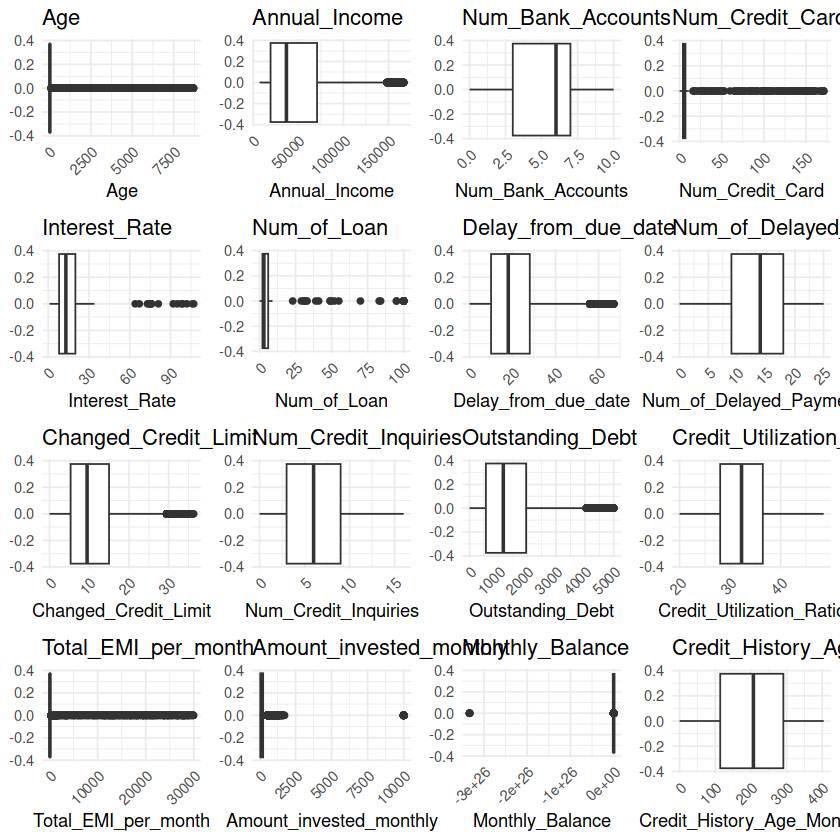

In [114]:
library(ggplot2)
library(cowplot)

# Get numeric columns
numeric_columns <- colnames(train)[sapply(train, is.numeric)]

# Number of columns and rows in the grid
num_columns <- 4
num_rows <- ceiling(length(numeric_columns) / num_columns)

# Create a list to store plots
plot_list <- list()

# Loop through numeric columns and create boxplots
for (i in 1:length(numeric_columns)) {
  plot_list[[i]] <- ggplot(train, aes_string(x = numeric_columns[i])) +
    geom_boxplot() +
    labs(title = numeric_columns[i]) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
}

# Arrange plots into a grid
plot_grid <- plot_grid(plotlist = plot_list, ncol = num_columns)

# Print the grid of boxplots
print(plot_grid)

In [115]:
#install.packages("cowplot")

# More Scaling

In [116]:
# Apply filtering conditions
train <- train[Age < 60 &
               Num_Credit_Card <= 10 &
               Interest_Rate <= 50 &
               Num_of_Loan <= 12 &
               Num_Bank_Accounts <= 10 &
               Delay_from_due_date <= 60 &
               Changed_Credit_Limit <= 30 &
               Num_Credit_Inquiries <= 12 &
               Total_EMI_per_month <= 200 &
               Outstanding_Debt <= 1500]

head(train)

Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
<int>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
23,Scientist,19114.12,3,4,3,4,5,4,6.27,⋯,Good,809.98,31.37786,No,49.57495,199.45807,Low_spent_Small_value_payments,223.4513,Good,268
23,Scientist,19114.12,3,4,3,4,3,8,11.27,⋯,Good,809.98,22.53759,No,49.57495,178.34407,Low_spent_Small_value_payments,244.5653,Good,271
23,Scientist,19114.12,3,4,3,4,3,6,11.27,⋯,Good,809.98,23.93379,No,49.57495,24.78522,High_spent_Medium_value_payments,358.1242,Standard,0
28,Teacher,34847.84,2,4,6,1,7,1,7.42,⋯,Good,605.03,38.55085,No,18.81621,40.39124,High_spent_Large_value_payments,484.5912,Good,320
28,Teacher,34847.84,2,4,6,1,3,3,5.42,⋯,Good,605.03,39.18266,No,18.81621,99.30623,Low_spent_Medium_value_payments,465.6762,Good,322
28,Teacher,34847.84,2,4,6,1,3,1,6.42,⋯,Good,605.03,34.97789,No,18.81621,130.11542,Low_spent_Small_value_payments,444.8670,Good,323


In [117]:
# Define categories
# Define the order of categories
categories <- c("Poor", "Standard", "Good")

# Convert 'Credit_Score_Encoded' to numeric while preserving order
train$Credit_Score_Encoded <- as.numeric(factor(train$Credit_Score, levels = categories))

# Print the updated data
head(train)

Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,⋯,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months,Credit_Score_Encoded
<int>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
23,Scientist,19114.12,3,4,3,4,5,4,6.27,⋯,809.98,31.37786,No,49.57495,199.45807,Low_spent_Small_value_payments,223.4513,Good,268,3
23,Scientist,19114.12,3,4,3,4,3,8,11.27,⋯,809.98,22.53759,No,49.57495,178.34407,Low_spent_Small_value_payments,244.5653,Good,271,3
23,Scientist,19114.12,3,4,3,4,3,6,11.27,⋯,809.98,23.93379,No,49.57495,24.78522,High_spent_Medium_value_payments,358.1242,Standard,0,2
28,Teacher,34847.84,2,4,6,1,7,1,7.42,⋯,605.03,38.55085,No,18.81621,40.39124,High_spent_Large_value_payments,484.5912,Good,320,3
28,Teacher,34847.84,2,4,6,1,3,3,5.42,⋯,605.03,39.18266,No,18.81621,99.30623,Low_spent_Medium_value_payments,465.6762,Good,322,3
28,Teacher,34847.84,2,4,6,1,3,1,6.42,⋯,605.03,34.97789,No,18.81621,130.11542,Low_spent_Small_value_payments,444.8670,Good,323,3


In [118]:
# Encode 'Occupation' column using labels
train[, Occupation_Encoded := factor(Occupation, labels = seq_along(unique(Occupation)))]

# Print the first few rows of the updated data table
head(train)

Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,⋯,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months,Credit_Score_Encoded,Occupation_Encoded
<int>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<fct>
23,Scientist,19114.12,3,4,3,4,5,4,6.27,⋯,31.37786,No,49.57495,199.45807,Low_spent_Small_value_payments,223.4513,Good,268,3,13
23,Scientist,19114.12,3,4,3,4,3,8,11.27,⋯,22.53759,No,49.57495,178.34407,Low_spent_Small_value_payments,244.5653,Good,271,3,13
23,Scientist,19114.12,3,4,3,4,3,6,11.27,⋯,23.93379,No,49.57495,24.78522,High_spent_Medium_value_payments,358.1242,Standard,0,2,13
28,Teacher,34847.84,2,4,6,1,7,1,7.42,⋯,38.55085,No,18.81621,40.39124,High_spent_Large_value_payments,484.5912,Good,320,3,14
28,Teacher,34847.84,2,4,6,1,3,3,5.42,⋯,39.18266,No,18.81621,99.30623,Low_spent_Medium_value_payments,465.6762,Good,322,3,14
28,Teacher,34847.84,2,4,6,1,3,1,6.42,⋯,34.97789,No,18.81621,130.11542,Low_spent_Small_value_payments,444.8670,Good,323,3,14


## Ordinal Encoder

In [119]:
# Define the order of categories
categories <- c("Poor", "Standard", "Good")

# Convert 'Credit_Mix_Encoded' to factor with specified levels
train$Credit_Mix_Encoded <- factor(train$Credit_Mix, levels = categories)

# Convert factor to numeric while preserving order
train$Credit_Mix_Encoded <- as.numeric(train$Credit_Mix_Encoded)
# Print the first few rows of the updated data table
head(train)

Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,⋯,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months,Credit_Score_Encoded,Occupation_Encoded,Credit_Mix_Encoded
<int>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<fct>,<dbl>
23,Scientist,19114.12,3,4,3,4,5,4,6.27,⋯,No,49.57495,199.45807,Low_spent_Small_value_payments,223.4513,Good,268,3,13,3
23,Scientist,19114.12,3,4,3,4,3,8,11.27,⋯,No,49.57495,178.34407,Low_spent_Small_value_payments,244.5653,Good,271,3,13,3
23,Scientist,19114.12,3,4,3,4,3,6,11.27,⋯,No,49.57495,24.78522,High_spent_Medium_value_payments,358.1242,Standard,0,2,13,3
28,Teacher,34847.84,2,4,6,1,7,1,7.42,⋯,No,18.81621,40.39124,High_spent_Large_value_payments,484.5912,Good,320,3,14,3
28,Teacher,34847.84,2,4,6,1,3,3,5.42,⋯,No,18.81621,99.30623,Low_spent_Medium_value_payments,465.6762,Good,322,3,14,3
28,Teacher,34847.84,2,4,6,1,3,1,6.42,⋯,No,18.81621,130.11542,Low_spent_Small_value_payments,444.8670,Good,323,3,14,3


In [120]:

# Define categories
categories_payment_behaviour <- c(
  'Low_spent_Small_value_payments', 
  'Low_spent_Medium_value_payments', 
  'Low_spent_Large_value_payments', 
  'High_spent_Small_value_payments', 
  'High_spent_Medium_value_payments', 
  'High_spent_Large_value_payments'
)

# Encode 'Payment_Behaviour' column
train[, Payment_Behaviour_Encoded := factor(Payment_Behaviour, levels = categories_payment_behaviour, ordered = TRUE)]

# Print the first few rows of the updated data table
head(train)

Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,⋯,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months,Credit_Score_Encoded,Occupation_Encoded,Credit_Mix_Encoded,Payment_Behaviour_Encoded
<int>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<fct>,<dbl>,<ord>
23,Scientist,19114.12,3,4,3,4,5,4,6.27,⋯,49.57495,199.45807,Low_spent_Small_value_payments,223.4513,Good,268,3,13,3,Low_spent_Small_value_payments
23,Scientist,19114.12,3,4,3,4,3,8,11.27,⋯,49.57495,178.34407,Low_spent_Small_value_payments,244.5653,Good,271,3,13,3,Low_spent_Small_value_payments
23,Scientist,19114.12,3,4,3,4,3,6,11.27,⋯,49.57495,24.78522,High_spent_Medium_value_payments,358.1242,Standard,0,2,13,3,High_spent_Medium_value_payments
28,Teacher,34847.84,2,4,6,1,7,1,7.42,⋯,18.81621,40.39124,High_spent_Large_value_payments,484.5912,Good,320,3,14,3,High_spent_Large_value_payments
28,Teacher,34847.84,2,4,6,1,3,3,5.42,⋯,18.81621,99.30623,Low_spent_Medium_value_payments,465.6762,Good,322,3,14,3,Low_spent_Medium_value_payments
28,Teacher,34847.84,2,4,6,1,3,1,6.42,⋯,18.81621,130.11542,Low_spent_Small_value_payments,444.8670,Good,323,3,14,3,Low_spent_Small_value_payments


In [121]:
# Define columns to drop
columns_to_drop <- c('Payment_Behaviour', 'Credit_Mix', 'Occupation', 'Credit_Score')

# Drop columns
train <- train[, !names(train) %in% columns_to_drop, with = FALSE]

# Print the first few rows of the updated data table
head(train)

Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,⋯,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Months,Credit_Score_Encoded,Occupation_Encoded,Credit_Mix_Encoded,Payment_Behaviour_Encoded
<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<ord>
23,19114.12,3,4,3,4,5,4,6.27,4,⋯,31.37786,No,49.57495,199.45807,223.4513,268,3,13,3,Low_spent_Small_value_payments
23,19114.12,3,4,3,4,3,8,11.27,4,⋯,22.53759,No,49.57495,178.34407,244.5653,271,3,13,3,Low_spent_Small_value_payments
23,19114.12,3,4,3,4,3,6,11.27,4,⋯,23.93379,No,49.57495,24.78522,358.1242,0,2,13,3,High_spent_Medium_value_payments
28,34847.84,2,4,6,1,7,1,7.42,2,⋯,38.55085,No,18.81621,40.39124,484.5912,320,3,14,3,High_spent_Large_value_payments
28,34847.84,2,4,6,1,3,3,5.42,2,⋯,39.18266,No,18.81621,99.30623,465.6762,322,3,14,3,Low_spent_Medium_value_payments
28,34847.84,2,4,6,1,3,1,6.42,2,⋯,34.97789,No,18.81621,130.11542,444.8670,323,3,14,3,Low_spent_Small_value_payments


# New Features

In [122]:

# Calculate the total number of accounts (Bank Accounts + Credit Cards)
train[, Total_Num_Accounts := Num_Bank_Accounts + Num_Credit_Card]

# Calculate the total outstanding debt per account
train[, Debt_Per_Account := Outstanding_Debt / Total_Num_Accounts]

# Calculate the ratio of outstanding debt to annual income
train[, Debt_to_Income_Ratio := Outstanding_Debt / Annual_Income]

# Calculate the total number of delayed payments per account
train[, Delayed_Payments_Per_Account := Num_of_Delayed_Payment / Total_Num_Accounts]

# Calculate the total monthly expenses (EMI + Monthly Investments)
train[, Total_Monthly_Expenses := Total_EMI_per_month + Amount_invested_monthly]

# Print the first few rows of the updated data table
head(train)

Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,⋯,Credit_History_Age_Months,Credit_Score_Encoded,Occupation_Encoded,Credit_Mix_Encoded,Payment_Behaviour_Encoded,Total_Num_Accounts,Debt_Per_Account,Debt_to_Income_Ratio,Delayed_Payments_Per_Account,Total_Monthly_Expenses
<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<fct>,<dbl>,<ord>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
23,19114.12,3,4,3,4,5,4,6.27,4,⋯,268,3,13,3,Low_spent_Small_value_payments,7,115.7114,0.04237600,0.5714286,249.03302
23,19114.12,3,4,3,4,3,8,11.27,4,⋯,271,3,13,3,Low_spent_Small_value_payments,7,115.7114,0.04237600,1.1428571,227.91902
23,19114.12,3,4,3,4,3,6,11.27,4,⋯,0,2,13,3,High_spent_Medium_value_payments,7,115.7114,0.04237600,0.8571429,74.36017
28,34847.84,2,4,6,1,7,1,7.42,2,⋯,320,3,14,3,High_spent_Large_value_payments,6,100.8383,0.01736205,0.1666667,59.20745
28,34847.84,2,4,6,1,3,3,5.42,2,⋯,322,3,14,3,Low_spent_Medium_value_payments,6,100.8383,0.01736205,0.5000000,118.12244
28,34847.84,2,4,6,1,3,1,6.42,2,⋯,323,3,14,3,Low_spent_Small_value_payments,6,100.8383,0.01736205,0.1666667,148.93163


# Drop based on MI sScore|

In [123]:
# Define columns to drop
columns_to_drop <- c(
  'Payment_of_Min_Amount', 'Age', 'Monthly_Balance', 'Total_Monthly_Expenses', 
  'Payment_Behaviour_Encoded', 'Amount_invested_monthly', 'Credit_Utilization_Ratio', 
  'Occupation_Encoded'
)

# Drop columns
train <- train[, !names(train) %in% columns_to_drop, with = FALSE]

# Print the first few rows of the updated data table
head(train)

Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Total_EMI_per_month,Credit_History_Age_Months,Credit_Score_Encoded,Credit_Mix_Encoded,Total_Num_Accounts,Debt_Per_Account,Debt_to_Income_Ratio,Delayed_Payments_Per_Account
<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
19114.12,3,4,3,4,5,4,6.27,4,809.98,49.57495,268,3,3,7,115.7114,0.04237600,0.5714286
19114.12,3,4,3,4,3,8,11.27,4,809.98,49.57495,271,3,3,7,115.7114,0.04237600,1.1428571
19114.12,3,4,3,4,3,6,11.27,4,809.98,49.57495,0,2,3,7,115.7114,0.04237600,0.8571429
34847.84,2,4,6,1,7,1,7.42,2,605.03,18.81621,320,3,3,6,100.8383,0.01736205,0.1666667
34847.84,2,4,6,1,3,3,5.42,2,605.03,18.81621,322,3,3,6,100.8383,0.01736205,0.5000000
34847.84,2,4,6,1,3,1,6.42,2,605.03,18.81621,323,3,3,6,100.8383,0.01736205,0.1666667


In [124]:
install.packages("corrplot")
library(corrplot)

Installing package into ‘/home/ziegler/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



In [125]:

# Calculate correlation matrix for numeric columns
corr_matrix <- cor(train[, .SD, .SDcols = sapply(train, is.numeric)], method = "pearson")

# Print the correlation matrix
print(corr_matrix)

                             Annual_Income Num_Bank_Accounts Num_Credit_Card
Annual_Income                   1.00000000     -0.1355512432     -0.07662223
Num_Bank_Accounts              -0.13555124      1.0000000000      0.20735323
Num_Credit_Card                -0.07662223      0.2073532277      1.00000000
Interest_Rate                  -0.13793044      0.3904570612      0.22147802
Num_of_Loan                    -0.28279748      0.1557266458      0.11663740
Delay_from_due_date            -0.11165998      0.3760718410      0.23587178
Num_of_Delayed_Payment         -0.15606784      0.4721901131      0.20504275
Changed_Credit_Limit           -0.09923458      0.2311729018      0.08723891
Num_Credit_Inquiries           -0.13054785      0.2432262354      0.16410620
Outstanding_Debt               -0.03956825      0.0746323382      0.09039549
Total_EMI_per_month             0.37951000      0.0002032597      0.03115753
Credit_History_Age_Months       0.09562169     -0.1217767922     -0.08468376

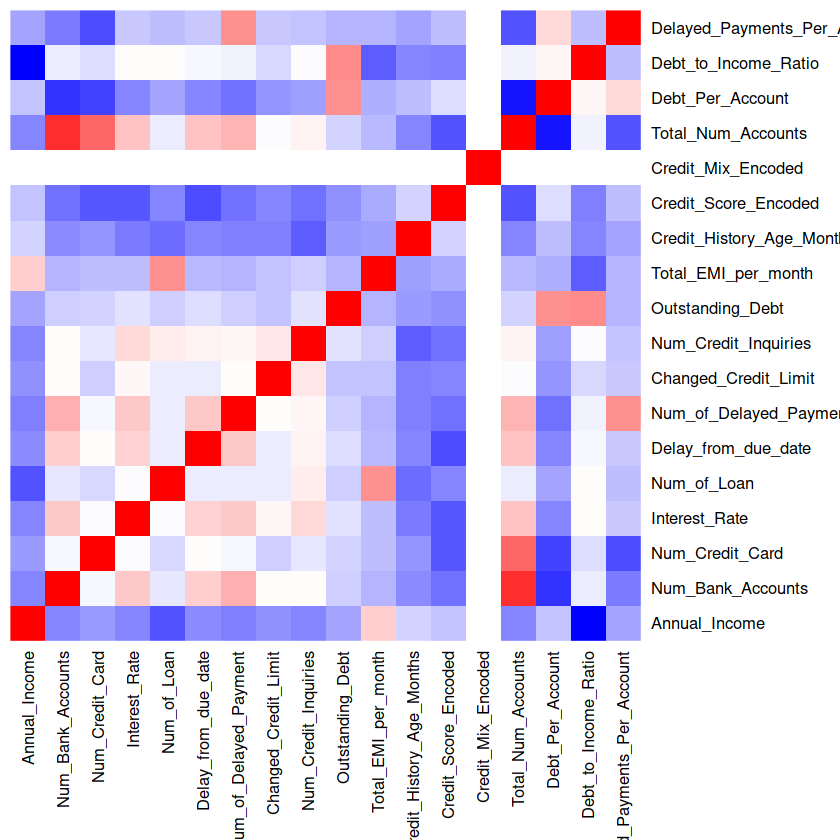

In [126]:
# Calculate correlation matrix for numeric columns
corr_matrix <- cor(train[, .SD, .SDcols = sapply(train, is.numeric)], method = "pearson")

# Plot correlation matrix as heatmap
heatmap(corr_matrix, 
        Colv = NA,    # Turn off column clustering
        Rowv = NA,    # Turn off row clustering
        col = colorRampPalette(c("blue", "white", "red"))(100),  # Color scheme
        scale = "none",  # Do not scale values
        margins = c(10, 10)  # Adjust margins
)

Warning message:
“Removed 608 rows containing non-finite values (`stat_boxplot()`).”


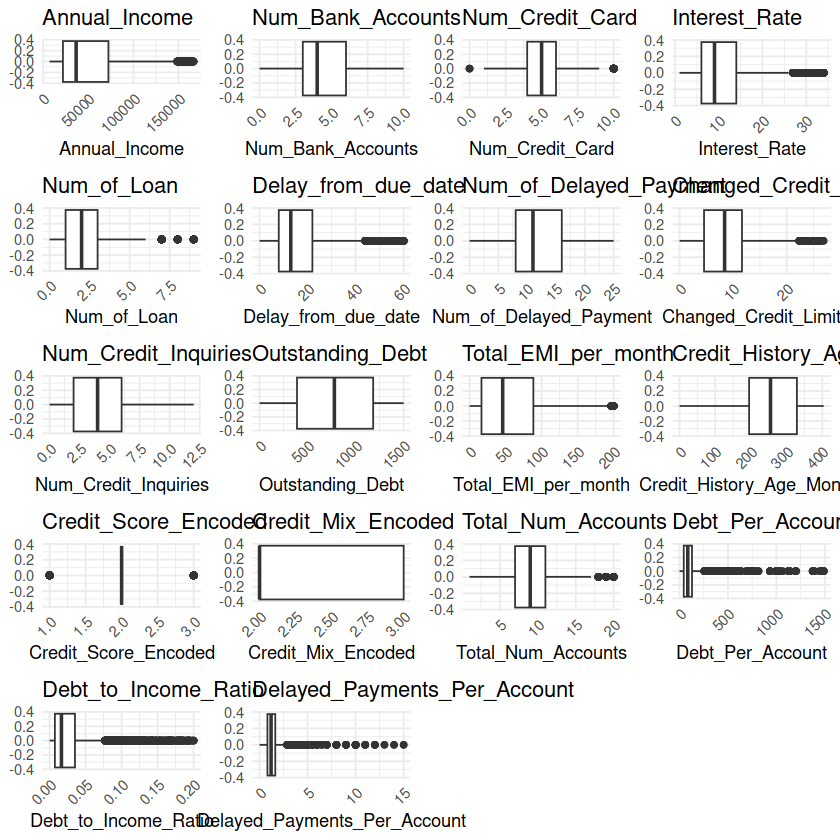

In [127]:

# Select numeric columns
numeric_columns <- colnames(train)[sapply(train, is.numeric)]

# Number of columns and rows in the grid
num_columns <- 4
num_rows <- ceiling(length(numeric_columns) / num_columns)

# Create a list to store plots
plot_list <- list()

# Loop through numeric columns and create boxplots
for (i in 1:length(numeric_columns)) {
  plot_list[[i]] <- ggplot(train, aes_string(x = numeric_columns[i])) +
    geom_boxplot() +
    labs(title = numeric_columns[i]) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
}

# Arrange plots into a grid
plot_grid <- plot_grid(plotlist = plot_list, ncol = num_columns)

# Print the grid of boxplots
print(plot_grid)

In [128]:

# Save the cleaned data to a CSV file
fwrite(train, file = "V2_R_trained_cleaned.csv", sep = ",", quote = FALSE)


In [129]:
# train <- fread("./input/train.csv")

# # Define the order of categories
# categories <- c("Poor", "Standard", "Good")

# # Convert 'Credit_Score_Encoded' to numeric while preserving order
# train$Credit_Score_Encoded <- as.numeric(factor(train$Credit_Score, levels = categories))

# # Print the updated data
# head(train)

In [130]:
# # Define the order of categories
# categories <- c("Poor", "Standard", "Good")

# # Convert 'Credit_Mix_Encoded' to factor with specified levels
# train$Credit_Mix_Encoded <- factor(train$Credit_Mix, levels = categories)

# # Convert factor to numeric while preserving order
# train$Credit_Mix_Encoded <- as.numeric(train$Credit_Mix_Encoded)

In [131]:
str(train$Credit_Mix_Encoded)

 num [1:28703] 3 3 3 3 3 3 3 3 3 3 ...
